# COURSE:   PGP [AI&ML]

## Learner :  Chaitanya Kumar Battula
## Module  : Deep Learning
## Topic   : Practice Project_Build an autoencoder model to regenerate the objects of the given MNIST dataset.

# Tasks
DESCRIPTION

Build an autoencoder model to regenerate the objects of the given MNIST dataset.

Objective: Regenerate the objects of MNIST dataset using autoencoder model.


In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.14.0'

In [3]:
import keras as k

Using TensorFlow backend.


In [4]:
k.__version__

'2.3.1'

In [5]:
import sklearn

In [6]:
sklearn.__version__

'0.21.2'

In [7]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [8]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [9]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [10]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
from keras.datasets import fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [12]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [13]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.5280 - val_loss: 0.4582
Epoch 2/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.4253 - val_loss: 0.4058
Epoch 3/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.3948 - val_loss: 0.3871
Epoch 4/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3775 - val_loss: 0.3713
Epoch 5/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3629 - val_loss: 0.3583
Epoch 6/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3513 - val_loss: 0.3482
Epoch 7/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3424 - val_loss: 0.3404
Epoch 8/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3355 - val_loss: 0.3344
Epoch 9/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.3300 - val_loss: 0.3297
Epoc

In [14]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

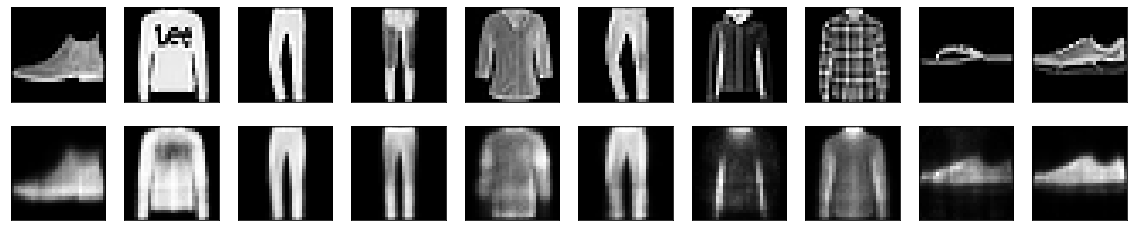

In [16]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# End Of Practice Project